# Problem 2

In [1]:
LoadFedeas('222');
format compact

ans =
  250.0000
  500.0000
  250.0000

 Norm of equilibrium error = 4.687351e-12
Elapsed time is 0.187344 seconds.
Tip displacement



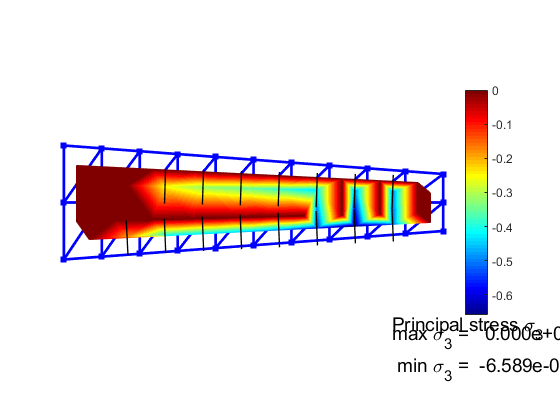

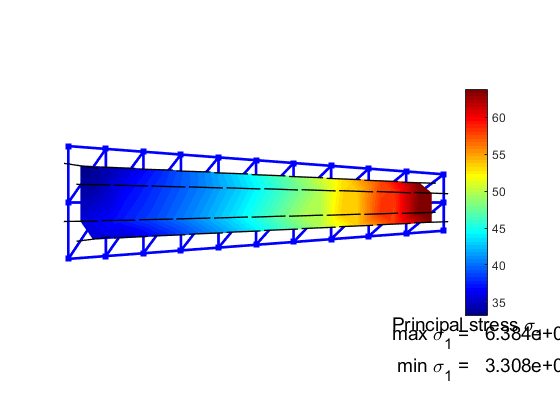

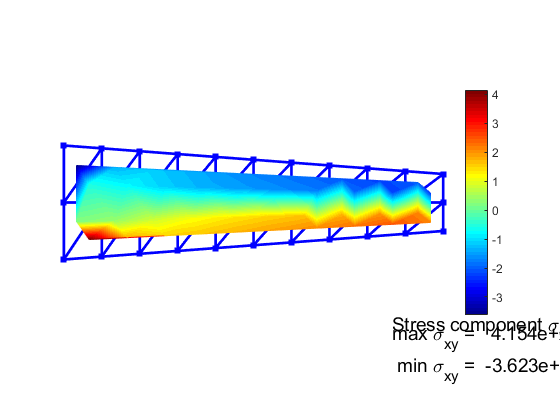

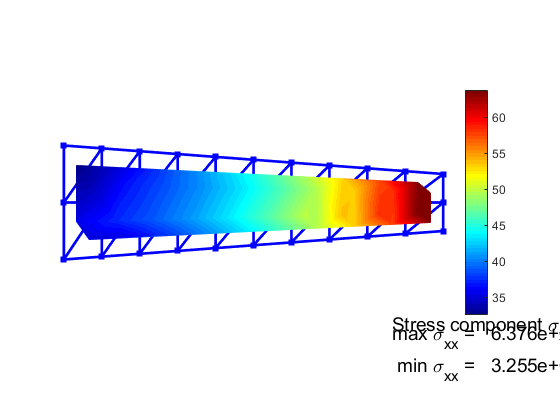

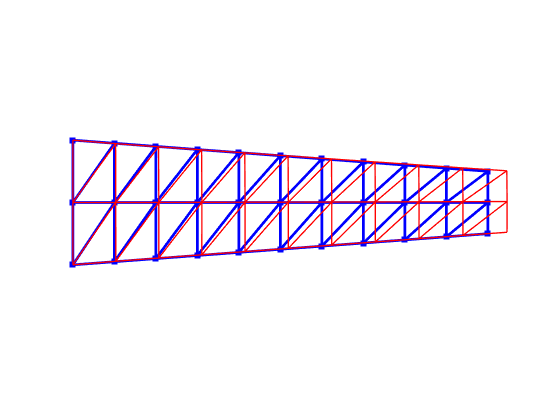

In [2]:
idx = 1; n = 10; m = 2; bc = 'a';
% Output{idx}.Case = strcat(num2str(n),'-',num2str(m),'-',bc);
Output{idx} = CE222_Hw4P2(10,2,'a');

### 20x4

In [3]:
idx = 2; n = 20; m = 4; bc = 'a';
Output{idx} = CE222_Hw4P2(n,m,bc,false);

ans =
  125.0000
  250.0000
  250.0000
  250.0000
  125.0000

 Norm of equilibrium error = 1.110270e-11
Elapsed time is 0.333585 seconds.



### 40x4

ans =
  125.0000
  250.0000
  250.0000
  250.0000
  125.0000

 Norm of equilibrium error = 2.614496e-11
Elapsed time is 0.618235 seconds.
Tip displacement



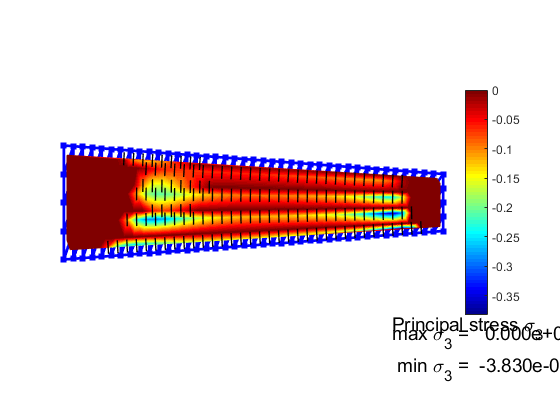

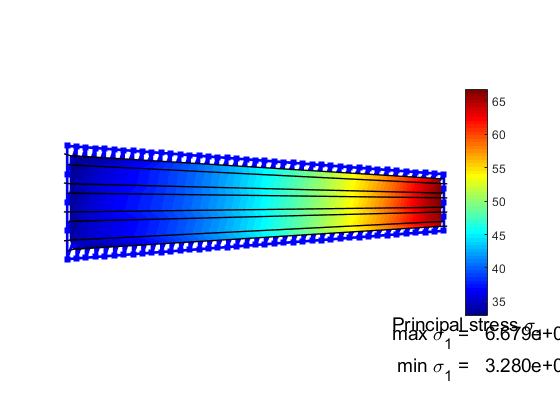

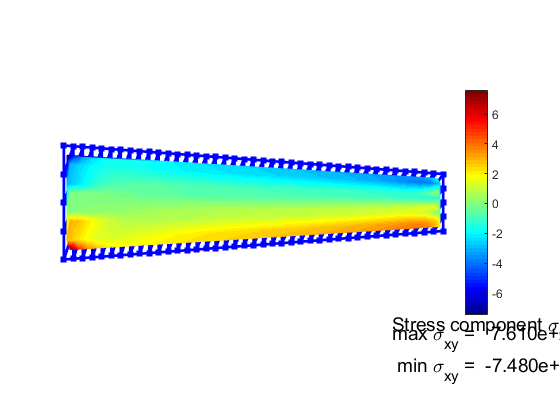

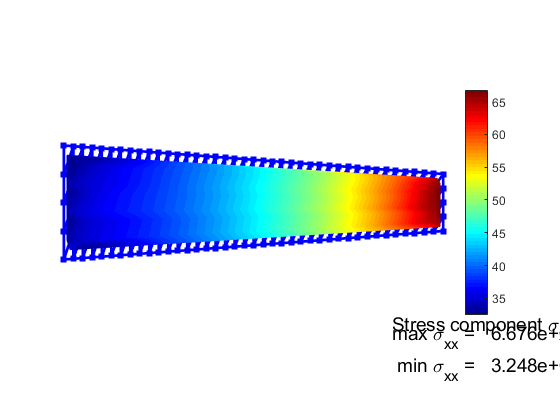

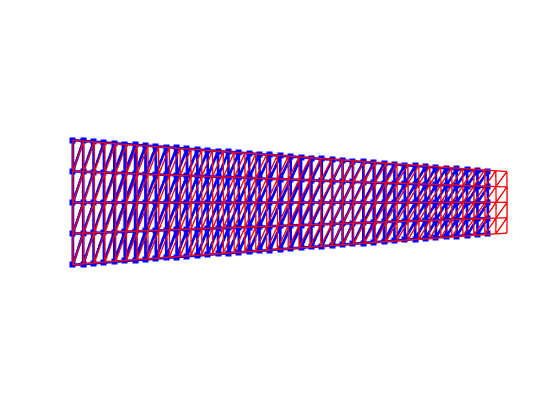

In [4]:
idx = 3; n = 40; m = 4; bc = 'a';
% CleanStart
% Output{idx}.Case = strcat(num2str(n),'-',num2str(m),'-',bc);
Output{idx} = CE222_Hw4P2(n,m,bc);

In [5]:
% Output{4}.Case = strcat(num2str(2),'-',num2str(2),'-','a');
Output{4} =  CE222_Hw4P2(2,2,'a',false);

ans =
  250.0000
  500.0000
  250.0000

 Norm of equilibrium error = 3.292876e-12
Elapsed time is 0.013195 seconds.



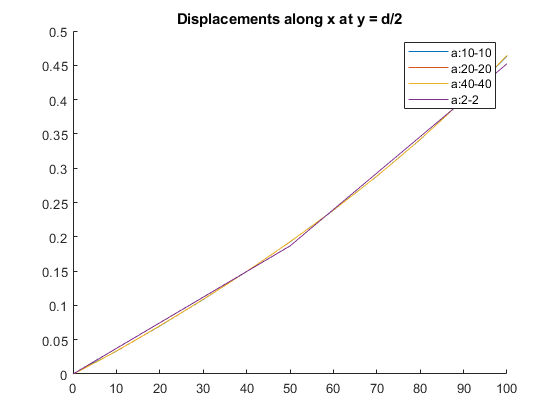

In [6]:
format compact
figure, hold on
for jdx=[1:4]
    out = Output{jdx};
    plot(out.State.x,out.State.Ux,'DisplayName',Output{jdx}.Case)
end
hold off
title('Displacements along x at y = d/2')
legend()

This plot indicates that the displacements of this problem are very insensitive to mesh resolution.

In [8]:
m=[ 2, 2, 4, 4, 6, 6];
n=[10,20,10,20,20,40];

bc = 'a'
for idx=[1:6]
    bc
    lx = 100/n(idx);
    ly = 30/m(idx);
    h = sqrt(lx^2 + ly^2)
    OutputA{idx} = CE222_Hw4P2( n(idx), m(idx),bc,false);
    OutputA{idx}.h = h
    OutputA{idx}.lbl = strcat('n:',num2str(n(idx)),' m:',num2str(m(idx)));
end

bc = 'b'
for idx=[1:6]
    bc
    lx = 100/n(idx);
    ly = 30/m(idx);
    h = sqrt(lx^2 + ly^2)
    OutputB{idx} = CE222_Hw4P2( n(idx), m(idx),bc,false);
    OutputB{idx}.h = h
    
    OutputB{idx}.lbl = strcat('n:',num2str(n(idx)),' m:',num2str(m(idx)));
end

bc =
    'a'
bc =
    'a'
h =
   18.0278
ans =
  250.0000
  500.0000
  250.0000

 Norm of equilibrium error = 4.687351e-12
Elapsed time is 0.087388 seconds.
OutputA =
  1x1 cell array
    {1x1 struct}
bc =
    'a'
h =
   15.8114
ans =
  250.0000
  500.0000
  250.0000

 Norm of equilibrium error = 6.116751e-12
Elapsed time is 0.126509 seconds.
OutputA =
  1x2 cell array
    {1x1 struct}    {1x1 struct}
bc =
    'a'
h =
   12.5000
ans =
  125.0000
  250.0000
  250.0000
  250.0000
  125.0000

 Norm of equilibrium error = 7.092050e-12
Elapsed time is 0.106591 seconds.
OutputA =
  1x3 cell array
    {1x1 struct}    {1x1 struct}    {1x1 struct}
bc =
    'a'
h =
    9.0139
ans =
  125.0000
  250.0000
  250.0000
  250.0000
  125.0000

 Norm of equilibrium error = 1.110270e-11
Elapsed time is 0.215658 seconds.
OutputA =
  1x4 cell array
    {1x1 struct}    {1x1 struct}    {1x1 struct}    {1x1 struct}
bc =
    'a'
h =
    7.0711
ans =
   83.3333
  166.6667
  166.6667
  166.6667
  166.6667
  166.

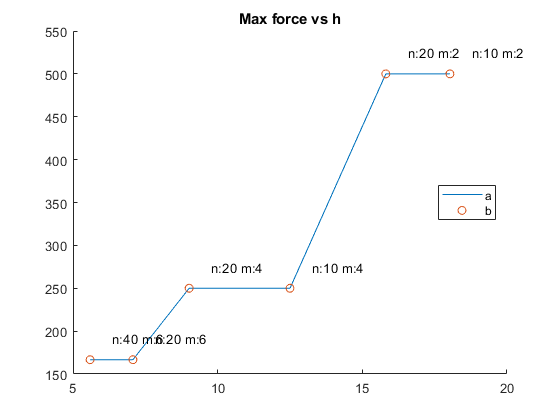

In [9]:
% clear ha,hb,Fb,Fa
figure, hold on

for jdx=[1:6]
    ha(jdx) = OutputA{jdx}.h;
    Fa(jdx) = max(OutputA{jdx}.F);
    lbl{jdx} = OutputA{jdx}.lbl;
end
plot(ha,Fa,'DisplayName','a')

    
for jdx=[1:6]
    hb(jdx) = OutputB{jdx}.h;
    Fb(jdx) = max(OutputB{jdx}.F);
end
plot(hb,Fb,'o','DisplayName','b')
text(hb+0.75,Fb+25,lbl)

hold off
title('Max force vs h')
legend('Location','east')

There is a lot that this plot is showing. The change in maximum force is generally decreasing as the representative element size, $h$, decreases, indicating convergence. However, this convergence is seemingly orthogonal to changes in lengthwise subdivisions, $n$. Additionally, models with the `a` and `b` boundary conditions behave exactly the same in this regard.

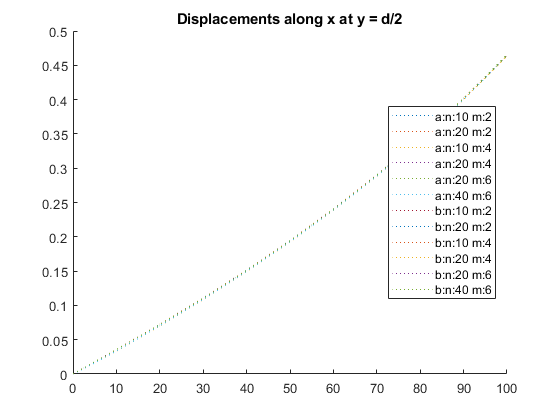

In [11]:
% clear ha,hb,Fb,Fa
figure, hold on

for jdx=[1:6]
    out = OutputA{jdx};
    lbl{jdx} = strcat('a: ',out.lbl);
    plot(out.State.x,out.State.Ux,':','DisplayName',lbl{jdx})
end

    
for jdx=[1:6]
    out = OutputB{jdx};
    lbl{jdx} = strcat('b: ',out.lbl);
    plot(out.State.x,out.State.Ux,':','DisplayName',lbl{jdx})
end

hold off
title('Displacements along x at y = d/2')
legend('Location','east')

This plot further shows the invariance of this particular problem to boundary conditions.